In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
Release mode
CMake Error at /usr/share/cmake-3.16/Modules/FindPackageHandleStandardArgs.cmake:146 (message):
  Could NOT find PythonInterp (missing: PYTHON_EXECUTABLE)
Call Stack (most recent call first):
  /usr/share/cmake-3.16/Modules/FindPackageHandleStandardArgs.cmake:393 (_FPHSA_FAILURE_MESSAGE)
  /usr/share/cmake-3.16/Modules/FindPythonInterp.cmake:169 (FIND_PACKAGE_HANDLE_STANDARD_ARGS)
  pybind11/tools/FindPythonLibsNew.cmake:60 (find_package)
  pybind11/tools/pybind11Tools.cmake:16 (find_package)
  pybind11/CMakeLists.txt:33 (include)


-- Configuring incomplete, errors occurred!
See also "/home/martinamigo/documents/uba/metodos/mn-tp3/tp3/CMakeFiles/CMakeOutput.log".
make: *** No rule to make target 'install'.  Stop.


In [41]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python3 --version #le agregué el 3 para que ande en mi pc
import sys
sys.path.append('/home/dante/Documents/metnum tps again/mn-tp3/tp3/metnum3/lib/python3.8/site-packages')
import metnum
import numpy as np
import matplotlib.pyplot as plt

/home/martinamigo/documents/uba/metodos/mn-tp3/tp3/notebooks
Python 3.8.10


In [42]:
#import sys
#sys.path.append('/home/dante/Documents/metnum tps again/mn-tp3/tp3/metnum3/lib/python3.8/site-packages')
import pandas as pd
import seaborn as sns
from utils import run_analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [43]:
df = pd.read_csv("../dataset-folder/expectativa_de_vida.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

In [44]:
df = df.drop('Unnamed: 0', 1)

/tmp/ipykernel_22532/3812631323.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 0', 1)


In [45]:
df = df.fillna(df.median())

/tmp/ipykernel_22532/3493596106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Life expectancy                  183 non-null    float64
 2   Adult Mortality                  183 non-null    float64
 3   infant deaths                    183 non-null    float64
 4   Alcohol                          183 non-null    float64
 5   percentage expenditure           183 non-null    float64
 6   Hepatitis B                      183 non-null    float64
 7   Measles                          183 non-null    float64
 8   BMI                              183 non-null    float64
 9   under-five deaths                183 non-null    float64
 10  Polio                            183 non-null    float64
 11  Total expenditure                183 non-null    float64
 12  Diphtheria            

In [47]:
df['logGDP'] = np.log(df['GDP'])

In [48]:
columnas = df.columns.to_list()

In [49]:
columnas.remove('Country')

In [50]:
columnas.remove('Life expectancy')

In [51]:
columnas.remove('Status')

In [52]:
columnas

['Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'logGDP']

In [53]:
for columna in columnas:
    df[columna] = (df[columna]-np.mean(df[columna]))/np.std(df[columna])

In [54]:
df.corr()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,logGDP
Life expectancy,1.000000,-0.896441,-0.199914,0.460338,0.524320,0.424982,-0.201076,0.712117,-0.225785,0.679231,0.288134,0.672322,-0.587153,0.572807,-0.048532,-0.514356,-0.507002,0.777659,0.756699,0.762051
Adult Mortality,-0.896441,1.000000,0.099440,-0.286186,-0.424081,-0.323565,0.098834,-0.609512,0.119620,-0.531039,-0.189767,-0.511538,0.696999,-0.476087,0.003835,0.402323,0.405641,-0.617743,-0.575950,-0.612657
infant deaths,-0.199914,0.099440,1.000000,-0.122681,-0.117735,-0.302109,0.711078,-0.285870,0.996959,-0.241408,-0.166771,-0.240281,0.024589,-0.137075,0.893373,0.511223,0.514146,-0.157516,-0.198099,-0.194137
Alcohol,0.460338,-0.286186,-0.122681,1.000000,0.465238,0.158400,-0.087982,0.447160,-0.119928,0.358592,0.424819,0.342223,-0.087220,0.439916,-0.044345,-0.500129,-0.485756,0.529341,0.584941,0.565655
percentage expenditure,0.524320,-0.424081,-0.117735,0.465238,1.000000,0.053111,-0.110970,0.361802,-0.120997,0.290563,0.237425,0.273418,-0.147532,0.942968,-0.046727,-0.363125,-0.365292,0.571490,0.550635,0.697302
Hepatitis B,0.424982,-0.323565,-0.302109,0.158400,0.053111,1.000000,-0.269598,0.288556,-0.316781,0.786280,0.151571,0.788851,-0.187507,0.127550,-0.209721,-0.217887,-0.226417,0.322994,0.374394,0.276712
Measles,-0.201076,0.098834,0.711078,-0.087982,-0.110970,-0.269598,1.000000,-0.309800,0.719636,-0.239703,-0.169604,-0.258502,0.034536,-0.127112,0.470007,0.315772,0.315019,-0.126524,-0.152123,-0.159427
BMI,0.712117,-0.609512,-0.285870,0.447160,0.361802,0.288556,-0.309800,1.000000,-0.299249,0.492030,0.382968,0.480829,-0.339924,0.424606,-0.142126,-0.714949,-0.717634,0.632331,0.655377,0.664430
under-five deaths,-0.225785,0.119620,0.996959,-0.119928,-0.120997,-0.316781,0.719636,-0.299249,1.000000,-0.267112,-0.168763,-0.267143,0.037544,-0.141815,0.878088,0.512822,0.514272,-0.176865,-0.213797,-0.206488
Polio,0.679231,-0.531039,-0.241408,0.358592,0.290563,0.786280,-0.239703,0.492030,-0.267112,1.000000,0.238479,0.945657,-0.245211,0.362371,-0.106706,-0.348941,-0.341646,0.574446,0.605035,0.545508


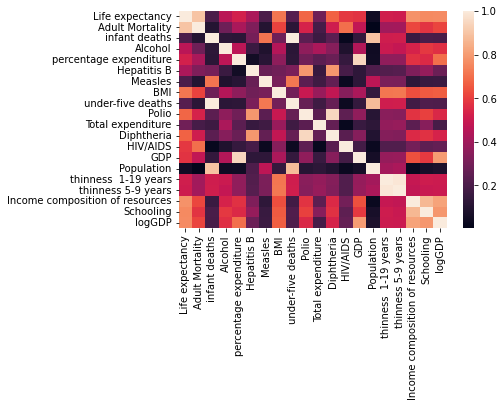

In [55]:
sns.heatmap(abs(df.corr()))
plt.savefig("heatmap_corr.png", bbox_inches='tight')

In [56]:
df['Life expectancy'].corr(df['Population'])

-0.04853176534893575

<AxesSubplot:xlabel='Life expectancy', ylabel='Population'>

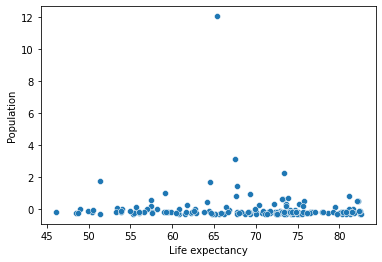

In [57]:
sns.scatterplot(data = df, x = "Life expectancy", y = 'Population')

In [58]:
df['Life expectancy'].corr(df['Adult Mortality'])

-0.8964413528900176

<AxesSubplot:xlabel='Life expectancy', ylabel='Adult Mortality'>

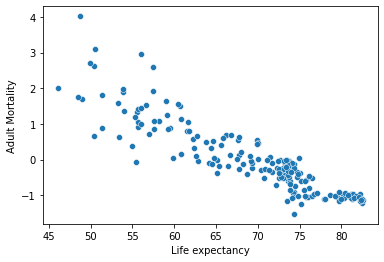

In [59]:
sns.scatterplot(data = df, x = "Life expectancy", y = 'Adult Mortality')

In [60]:
z = abs(df.corr()['Life expectancy'])

In [61]:
zorden = z.sort_values(ascending=False)

In [62]:
zorden

Life expectancy                    1.000000
Adult Mortality                    0.896441
Income composition of resources    0.777659
logGDP                             0.762051
Schooling                          0.756699
BMI                                0.712117
Polio                              0.679231
Diphtheria                         0.672322
HIV/AIDS                           0.587153
GDP                                0.572807
percentage expenditure             0.524320
thinness  1-19 years               0.514356
thinness 5-9 years                 0.507002
Alcohol                            0.460338
Hepatitis B                        0.424982
Total expenditure                  0.288134
under-five deaths                  0.225785
Measles                            0.201076
infant deaths                      0.199914
Population                         0.048532
Name: Life expectancy, dtype: float64

In [63]:
df.corr()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,logGDP
Life expectancy,1.000000,-0.896441,-0.199914,0.460338,0.524320,0.424982,-0.201076,0.712117,-0.225785,0.679231,0.288134,0.672322,-0.587153,0.572807,-0.048532,-0.514356,-0.507002,0.777659,0.756699,0.762051
Adult Mortality,-0.896441,1.000000,0.099440,-0.286186,-0.424081,-0.323565,0.098834,-0.609512,0.119620,-0.531039,-0.189767,-0.511538,0.696999,-0.476087,0.003835,0.402323,0.405641,-0.617743,-0.575950,-0.612657
infant deaths,-0.199914,0.099440,1.000000,-0.122681,-0.117735,-0.302109,0.711078,-0.285870,0.996959,-0.241408,-0.166771,-0.240281,0.024589,-0.137075,0.893373,0.511223,0.514146,-0.157516,-0.198099,-0.194137
Alcohol,0.460338,-0.286186,-0.122681,1.000000,0.465238,0.158400,-0.087982,0.447160,-0.119928,0.358592,0.424819,0.342223,-0.087220,0.439916,-0.044345,-0.500129,-0.485756,0.529341,0.584941,0.565655
percentage expenditure,0.524320,-0.424081,-0.117735,0.465238,1.000000,0.053111,-0.110970,0.361802,-0.120997,0.290563,0.237425,0.273418,-0.147532,0.942968,-0.046727,-0.363125,-0.365292,0.571490,0.550635,0.697302
Hepatitis B,0.424982,-0.323565,-0.302109,0.158400,0.053111,1.000000,-0.269598,0.288556,-0.316781,0.786280,0.151571,0.788851,-0.187507,0.127550,-0.209721,-0.217887,-0.226417,0.322994,0.374394,0.276712
Measles,-0.201076,0.098834,0.711078,-0.087982,-0.110970,-0.269598,1.000000,-0.309800,0.719636,-0.239703,-0.169604,-0.258502,0.034536,-0.127112,0.470007,0.315772,0.315019,-0.126524,-0.152123,-0.159427
BMI,0.712117,-0.609512,-0.285870,0.447160,0.361802,0.288556,-0.309800,1.000000,-0.299249,0.492030,0.382968,0.480829,-0.339924,0.424606,-0.142126,-0.714949,-0.717634,0.632331,0.655377,0.664430
under-five deaths,-0.225785,0.119620,0.996959,-0.119928,-0.120997,-0.316781,0.719636,-0.299249,1.000000,-0.267112,-0.168763,-0.267143,0.037544,-0.141815,0.878088,0.512822,0.514272,-0.176865,-0.213797,-0.206488
Polio,0.679231,-0.531039,-0.241408,0.358592,0.290563,0.786280,-0.239703,0.492030,-0.267112,1.000000,0.238479,0.945657,-0.245211,0.362371,-0.106706,-0.348941,-0.341646,0.574446,0.605035,0.545508


In [64]:
df_enf = df[['Polio', 'Measles', 'HIV/AIDS', 'Diphtheria', 'Hepatitis B']]

<AxesSubplot:>

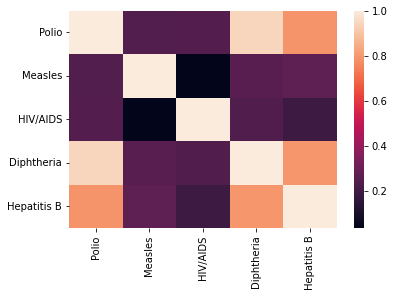

In [65]:
sns.heatmap(abs(df_enf.corr()))

In [66]:
df_enf2 = df_enf[['Polio', 'Diphtheria', 'Hepatitis B']]

In [67]:
df_econ = df[['Schooling','percentage expenditure','GDP','Income composition of resources']]

<AxesSubplot:>

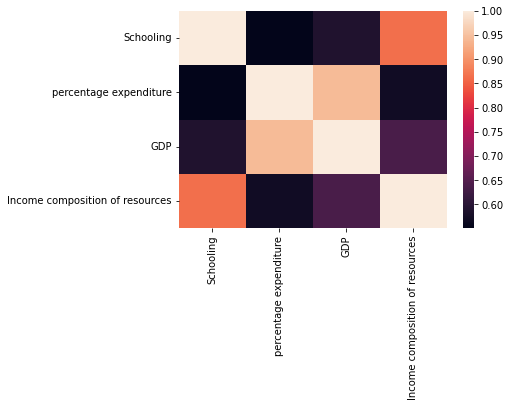

In [68]:
sns.heatmap(abs(df_econ.corr()))

<AxesSubplot:xlabel='percentage expenditure', ylabel='GDP'>

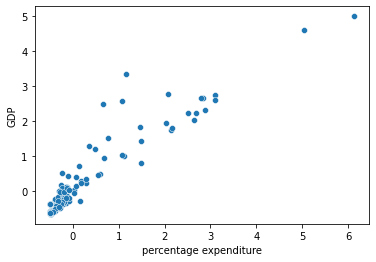

In [69]:
sns.scatterplot(data = df, x = "percentage expenditure", y = 'GDP')

<AxesSubplot:xlabel='Income composition of resources', ylabel='Schooling'>

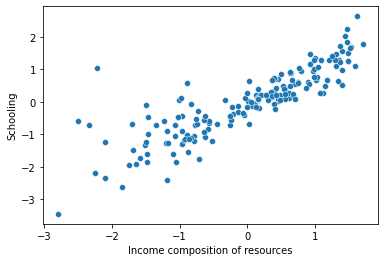

In [70]:
sns.scatterplot(data = df, x = "Income composition of resources", y = 'Schooling')

<AxesSubplot:xlabel='thinness  1-19 years', ylabel='thinness 5-9 years'>

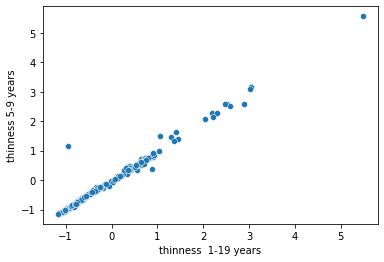

In [71]:
sns.scatterplot(data = df, x = "thinness  1-19 years", y = 'thinness 5-9 years')

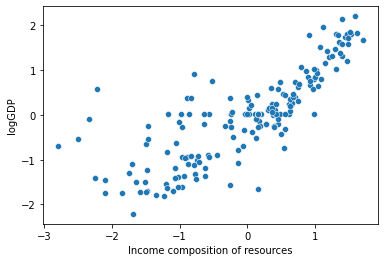

In [72]:
s = sns.scatterplot(data = df, x = "Income composition of resources", y = 'logGDP')


## Influence plots

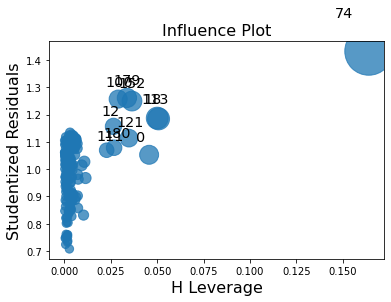

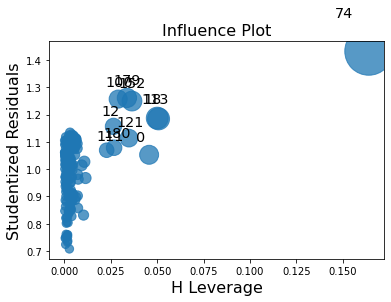

In [73]:
model = sm.OLS(df['Life expectancy'],df['thinness  1-19 years'])
results = model.fit()
influence_plot(results)
#sacar el de 74, india (capaz en valores absolutos está en el borde, pero se repite peor en otros)

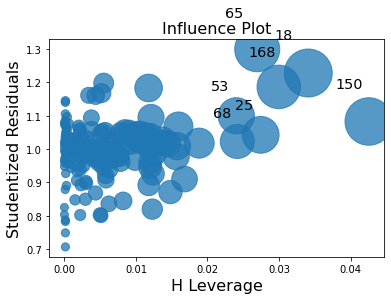

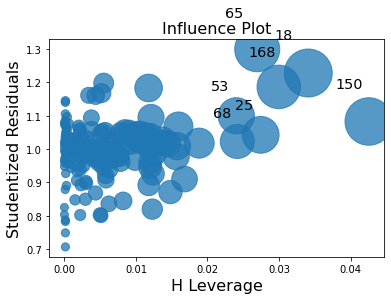

In [74]:
model = sm.OLS(df['Life expectancy'],df['Income composition of resources'])
results = model.fit()
influence_plot(results)
#están bien porque son valores bajos

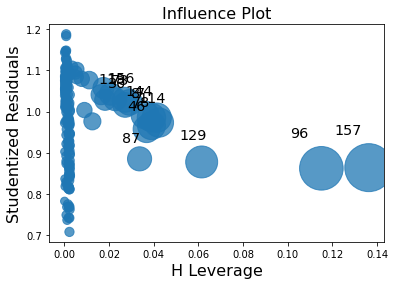

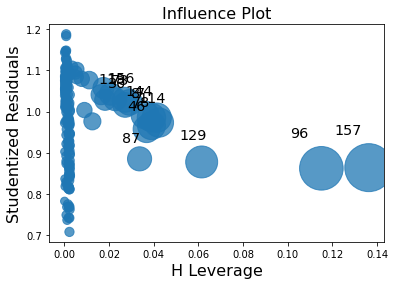

In [75]:
model = sm.OLS(df['Life expectancy'],df['GDP'])
results = model.fit()
influence_plot(results)
#quizás sacar el 96 y/o 157

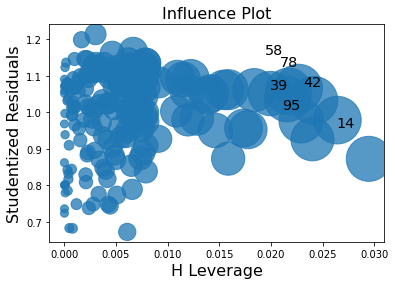

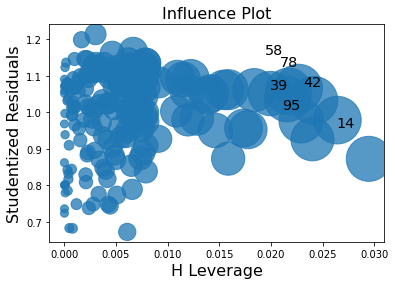

In [76]:
model = sm.OLS(df['Life expectancy'],df['Alcohol'])
results = model.fit()
influence_plot(results)
#valores bajos :)

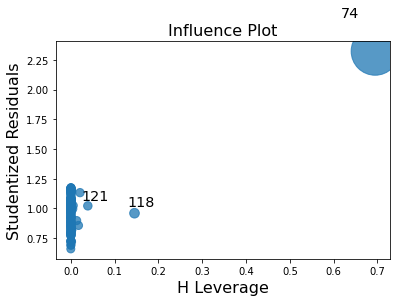

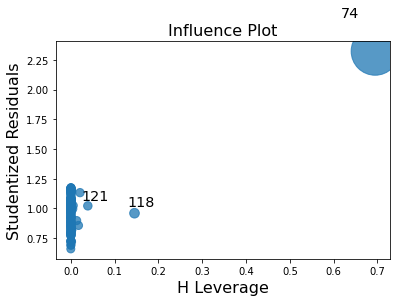

In [77]:
model = sm.OLS(df['Life expectancy'],df['under-five deaths'])
results = model.fit()
influence_plot(results)
#india se va de tema
#el 118 (nigeria) y 121 (pakistan) también

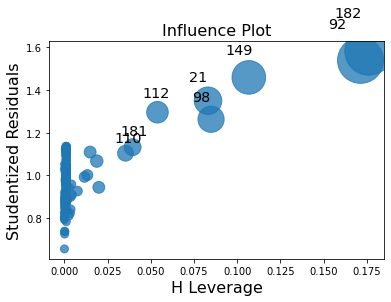

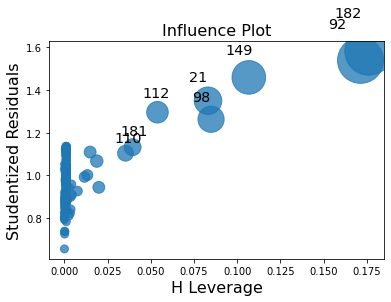

In [85]:
model = sm.OLS(df['Life expectancy'],df['HIV/AIDS'])
results = model.fit()
influence_plot(results)
#el 155 es demasiado

In [79]:
df['Country'][155]

'Swaziland'

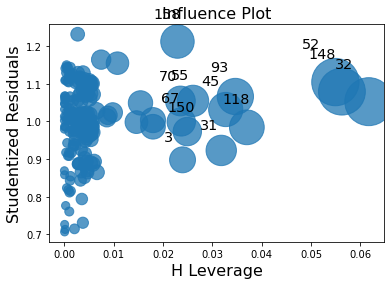

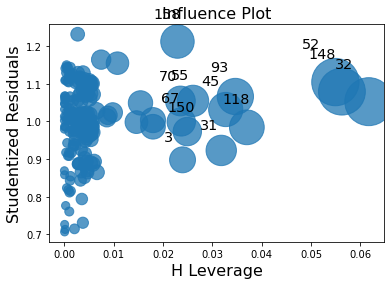

In [80]:
model = sm.OLS(df['Life expectancy'],df['Diphtheria'])
results = model.fit()
influence_plot(results)
#valores bajos

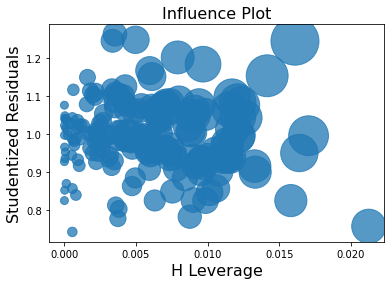

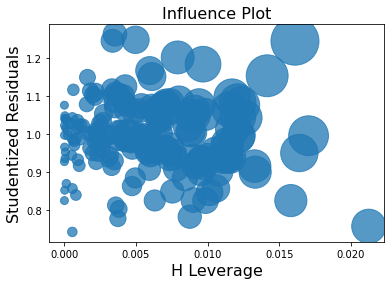

In [81]:
model = sm.OLS(df['Life expectancy'],df['BMI'])
results = model.fit()
influence_plot(results)
# valores muy bajos en x

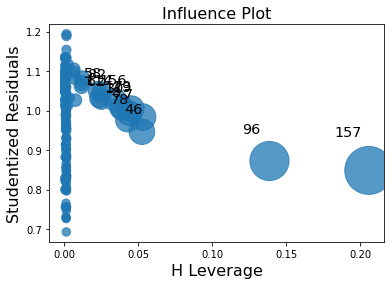

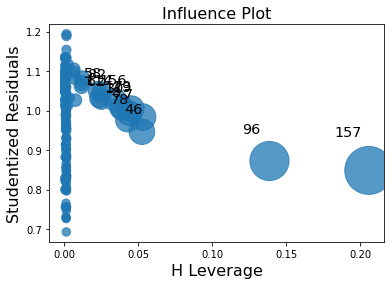

In [82]:
model = sm.OLS(df['Life expectancy'],df['percentage expenditure'])
results = model.fit()
influence_plot(results)
# podrían ser el 96 y 157, pero tienen valores bajos en y

Para correr el siguiente fragmento será necesario correr primero la sección final, donde se agregan datos externos

In [41]:
ys = df['Life expectancy']

xs = df.drop('Life expectancy', axis=1)

df_joined = pd.read_csv("../dataset-folder/df_final.csv")

df_joined=df_joined[["Country","FactValueNumeric"]]

df_final = pd.merge(xs, df_joined, how='left', left_on='Country', right_on='Country')

for column in df_final:
    df_final[[column]] = df_final[[column]].fillna(df_final.median())
    
df_final["homicides(logaritmic)"] = np.log(df_final["FactValueNumeric"])



/tmp/ipykernel_20680/3195070209.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final[[column]] = df_final[[column]].fillna(df_final.median())
/tmp/ipykernel_20680/3195070209.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final[[column]] = df_final[[column]].fillna(df_final.median())
/tmp/ipykernel_20680/3195070209.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final[[column]] = df_final[[column]].fillna(df_final.median())
/tmp/ipykernel_20680/3195070209.py:12

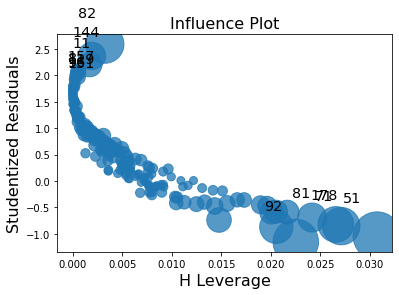

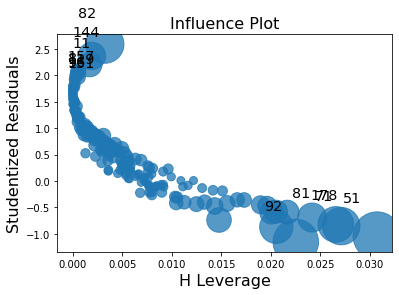

In [42]:
model = sm.OLS(df['Life expectancy'],df_final['homicides(logaritmic)'])
results = model.fit()
influence_plot(results)
#el 82 y el 51 quizás, pero
# considerar que los valores del eje x son bajos

### Elimino los indicados

In [40]:
# No los eliminamos! los reemplazamos por la media
#df = df.drop(74) 
#df = df.drop(118)
#df = df.drop(121)
#df = df.drop(155)

In [83]:
df['HIV/AIDS'][155] = np.mean(df['HIV/AIDS'])

/tmp/ipykernel_22532/148561434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HIV/AIDS'][155] = np.mean(df['HIV/AIDS'])


### Rehago los gráficos afectados

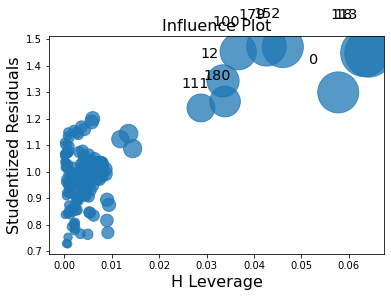

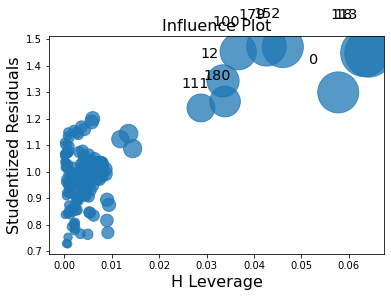

In [44]:
model = sm.OLS(df['Life expectancy'],df['thinness  1-19 years'])
results = model.fit()
influence_plot(results)

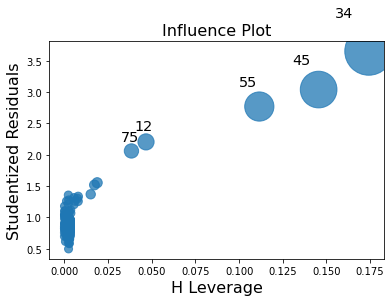

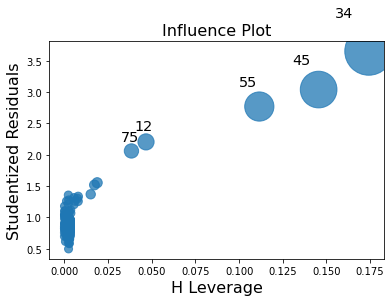

In [45]:
model = sm.OLS(df['Life expectancy'],df['under-five deaths'])
results = model.fit()
influence_plot(results)

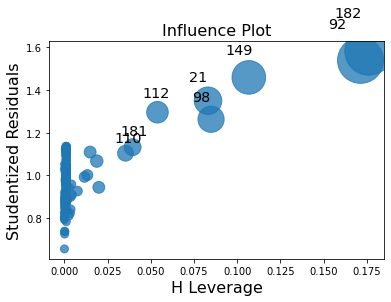

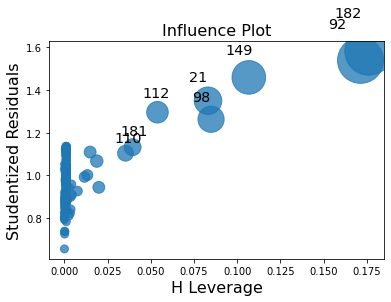

In [84]:
model = sm.OLS(df['Life expectancy'],df['HIV/AIDS'])
results = model.fit()
influence_plot(results)

### Recalculo las métricas del predictor

In [47]:
ys = df['Life expectancy']

In [48]:
xs = df.drop('Life expectancy', axis=1)

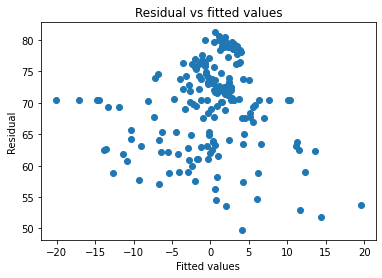

R2: [0.60250949]
R2 ajustado: [0.60026378]
RSE: [5.74004819]


array([ 7.01440175, 69.34428501])

In [49]:
run_analysis(xs[[
'Income composition of resources']], ys.values.reshape(-1, 1))

In [50]:
variance_inflation_factor(xs[['Income composition of resources','Schooling']].to_numpy(),1)  

3.966055799546647

In [51]:
variance_inflation_factor(xs[['Income composition of resources','BMI']].to_numpy(),1)  

1.6483011313807725

In [52]:
vif = variance_inflation_factor(xs[['Income composition of resources','Diphtheria']].to_numpy(),1)
print(vif)
vif = variance_inflation_factor(xs[['Income composition of resources','Polio']].to_numpy(),1)
print(vif)
vif = variance_inflation_factor(xs[['Income composition of resources','Hepatitis B']].to_numpy(),1)  
print(vif)

1.4181286825458639
1.4750351876742211
1.105665164700698


In [53]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS']].to_numpy(),1)  

1.1153109215004788

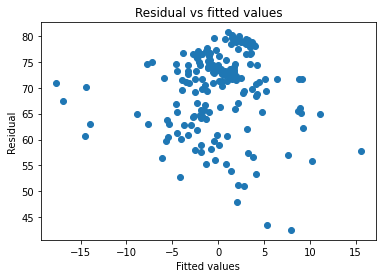

R2: [0.74576331]
R2 ajustado: [0.74287426]
RSE: [4.59061916]


array([ 5.85474834, -4.20509544, 69.20053498])

In [54]:
run_analysis(xs[[
'Income composition of resources', 'HIV/AIDS']].to_numpy(), ys.values.reshape(-1, 1))

In [55]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','GDP']].to_numpy(),2)  
#con GDP no hay colinealidad pero sí con logGDP, capaz por eso no suma tanto?

1.6780815948496148

In [56]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','logGDP']].to_numpy(),2)  

2.9859222428436176

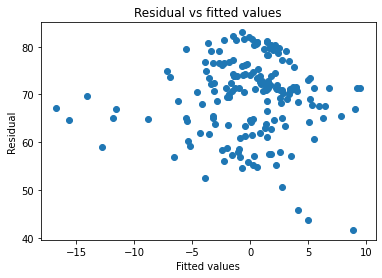

R2: [0.7901653]
R2 ajustado: [0.78656814]
RSE: [4.17052572]


array([ 3.2260575 , -4.02297144,  3.28038841, 69.20662678])

In [57]:
run_analysis(xs[[
'Income composition of resources', 'HIV/AIDS', 'logGDP']].to_numpy(), ys.values.reshape(-1, 1))

In [58]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','GDP','percentage expenditure']].to_numpy(),3)  

9.13617889877419

In [59]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years']].to_numpy(),3)  

1.3985684708955533

In [60]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','GDP','thinness 5-9 years']].to_numpy(),3)  

1.3834242869575688

In [61]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','GDP','thinness 5-9 years','thinness  1-19 years']].to_numpy(),4)  

27.35827177881201

^^ puedo agregar un thinness pero no los dos

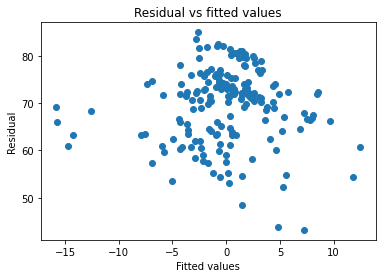

R2: [0.77044586]
R2 ajustado: [0.76516875]
RSE: [4.36209098]


array([ 4.54388244, -4.05001377,  1.14697923, -1.34633225, 69.14305141])

In [62]:
run_analysis(xs[[
'Income composition of resources', 'HIV/AIDS', 'GDP','thinness  1-19 years']].to_numpy(), ys.values.reshape(-1, 1))

In [63]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years', 'Alcohol']].to_numpy(),4)  

1.6732476162105399

In [64]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','Total expenditure']].to_numpy(),4)

1.1731919431023414

In [65]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years', 'under-five deaths']].to_numpy(),4)  

1.152544823133918

In [66]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years', 'infant deaths']].to_numpy(),4)  

1.1237342396869516

In [67]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','under-five deaths', 'infant deaths']].to_numpy(),5)
#deaths por separado sí, juntas no

74.57189575131709

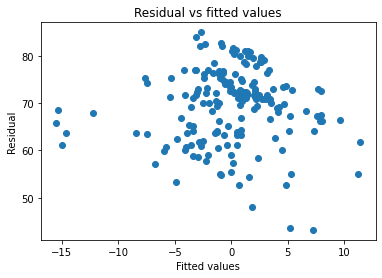

R2: [0.77296471]
R2 ajustado: [0.76640299]
RSE: [4.33809284]


array([ 4.35996138, -4.12639949,  1.07307475, -1.11383439,  0.58634163,
       69.15414768])

In [68]:
run_analysis(xs[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','Alcohol']].to_numpy(), ys.values.reshape(-1, 1))

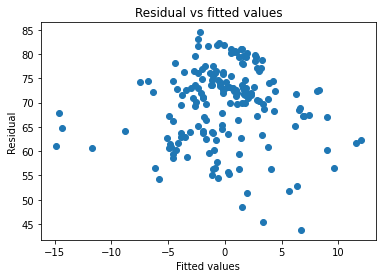

R2: [0.79150539]
R2 ajustado: [0.78547954]
RSE: [4.15718708]


array([ 4.38598169, -3.94327657,  1.03804091, -1.00547583, -4.21418231,
       68.72611201])

In [69]:
run_analysis(xs[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','under-five deaths']].to_numpy(), ys.values.reshape(-1, 1))

In [70]:
variance_inflation_factor(xs[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','Alcohol','under-five deaths']].to_numpy(),4)

1.679777840724752

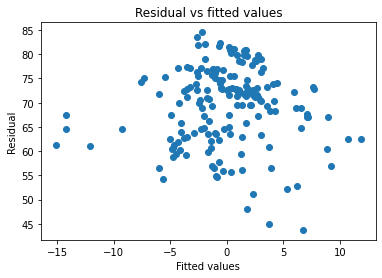

R2: [0.79308005]
R2 ajustado: [0.78586191]
RSE: [4.14145875]


array([ 4.24333751, -4.00597427,  0.98163469, -0.82798895,  0.46484381,
       -4.12968621, 68.74326879])

In [71]:
run_analysis(xs[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','Alcohol','under-five deaths']].to_numpy(), ys.values.reshape(-1, 1))

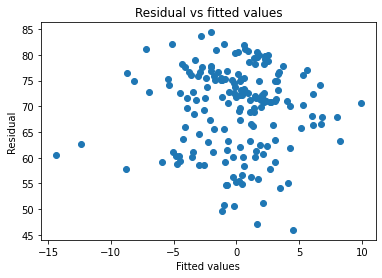

R2: [0.84713757]
R2 ajustado: [0.84271958]
RSE: [3.55961091]


array([ 2.73325189, -3.47247768,  2.44956645,  1.97363676,  1.22589204,
       69.16285354])

In [72]:
run_analysis(xs[[
'Income composition of resources', 'HIV/AIDS', 'Diphtheria', 'BMI', 'GDP']], ys.values.reshape(-1, 1))

# Agregamos columna de datos externos

In [73]:
df_joined = pd.read_csv("../dataset-folder/df_final.csv")

In [74]:
df_joined=df_joined[["Country","FactValueNumeric"]]

In [75]:
df_final = pd.merge(xs, df_joined, how='left', left_on='Country', right_on='Country')

In [76]:
df_final

,Country,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status,logGDP,FactValueNumeric
0,Afghanistan,1.086988,0.413583,-1.199735,-0.477603,-0.841792,-0.008141,-1.442318,0.416461,-2.132237,...,-0.371486,-0.635991,-0.023543,2.889655,2.581457,-1.198893,-1.254105,Developing,-1.550901,8.688
1,Albania,-1.248243,-0.256919,0.063173,-0.370418,1.128700,-0.294642,0.682638,-0.262691,0.985998,...,-0.371486,-0.460260,-0.296104,-0.791681,-0.763582,0.453504,0.039463,Developing,-0.209905,3.674
2,Algeria,-0.590156,-0.087267,-1.097255,-0.341352,-0.049912,-0.060056,0.662053,-0.118979,0.586425,...,-0.371486,-0.388364,0.319609,0.309337,0.266587,0.369341,0.228967,Developing,0.006465,1.656
3,Angola,1.707284,0.461128,0.296173,-0.432142,-0.508261,0.140647,-1.283976,0.576098,-2.273263,...,0.140017,-0.474536,-0.018405,0.333940,0.433764,-0.957626,-1.309720,Developing,-0.261672,9.600
4,Antigua and Barbuda,-0.388821,-0.262862,0.873155,0.176903,1.144415,-0.301265,0.008495,-0.268663,0.911567,...,-0.365850,0.294081,-0.207209,-0.347276,-0.359949,-0.787898,-1.046063,Developing,0.908978,2.418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Venezuela (Bolivarian Republic of),-0.018728,-0.181818,0.734874,-0.501274,-0.742346,-0.280790,1.025845,-0.200190,-0.483020,...,-0.371486,-0.379455,-0.207209,-0.783992,-0.796717,0.548538,0.253684,Developing,0.029320,61.860
175,Viet Nam,-0.398594,-0.010546,-0.396971,-0.501274,0.512195,0.223987,-1.716646,-0.036175,0.786211,...,-0.361622,-0.379455,-0.207209,2.482155,2.591999,-0.011145,-0.166519,Developing,0.029320,1.812
176,Yemen,0.490149,0.077521,-1.191125,-0.501274,-1.364800,0.041362,-0.304232,0.060165,-0.957023,...,-0.371486,-0.379455,-0.207209,2.213052,2.140171,-0.861540,-1.157293,Developing,0.029320,9.202
177,Zambia,1.975731,0.026194,-0.618498,-0.440572,-0.532071,0.513217,-1.319999,0.064942,-1.129388,...,2.295937,-0.589405,-0.132622,0.503091,0.456355,-0.732841,-0.265390,Developing,-0.913193,6.656


In [77]:
for column in df_final:
    df_final[[column]] = df_final[[column]].fillna(df_final.median())

/tmp/ipykernel_20680/2267368188.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final[[column]] = df_final[[column]].fillna(df_final.median())
/tmp/ipykernel_20680/2267368188.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final[[column]] = df_final[[column]].fillna(df_final.median())
/tmp/ipykernel_20680/2267368188.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_final[[column]] = df_final[[column]].fillna(df_final.median())
/tmp/ipykernel_20680/2267368188.py:2: Fu

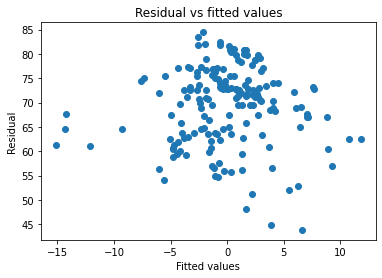

R2: [0.79319531]
R2 ajustado: [0.78472962]
RSE: [4.14030513]


array([ 4.24801272e+00, -3.97814289e+00,  9.50327598e-01, -8.44777878e-01,
        4.65053914e-01, -4.14258568e+00, -8.61767759e-03,  6.88150764e+01])

In [78]:

run_analysis(df_final[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','Alcohol','under-five deaths','FactValueNumeric']], ys.values.reshape(-1, 1))

In [79]:
df_final["homicides(logaritmic)"] = np.log(df_final["FactValueNumeric"])



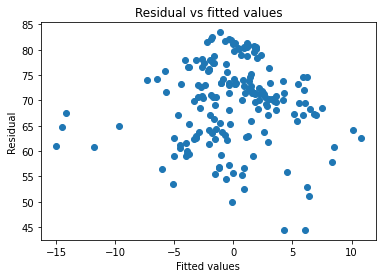

R2: [0.80303033]
R2 ajustado: [0.79496724]
RSE: [4.04065559]


array([ 4.07141688, -3.73161461,  0.39950058, -0.96861411,  0.48408528,
       -4.15272551, -0.98590735, 70.18546344])

In [80]:
run_analysis(df_final[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','Alcohol','under-five deaths',"homicides(logaritmic)"]], ys.values.reshape(-1, 1))


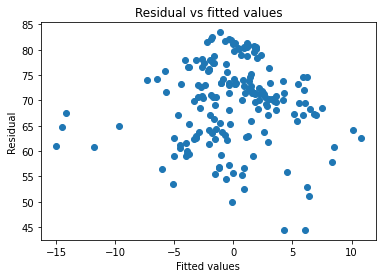

R2: [0.80303033]
R2 ajustado: [0.79496724]
RSE: [4.04065559]
[ 4.07141688 -3.73161461  0.39950058 -0.96861411  0.48408528 -4.15272551
 -0.98590735 70.18546344]


In [81]:
coef = run_analysis(df_final[['Income composition of resources','HIV/AIDS','GDP','thinness  1-19 years','Alcohol','under-five deaths',"homicides(logaritmic)"]], ys.values.reshape(-1, 1))
print(coef)